In [1]:
#!pip install xgboost

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import make_classification
from sklearn.ensemble import IsolationForest

In [3]:
df=pd.read_csv("Fraud_check.csv")

In [4]:
df.head()

,Undergrad,MaritalStatus,TaxableIncome,CityPopulation,WorkExperience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Undergrad       600 non-null    object
 1   MaritalStatus   600 non-null    object
 2   TaxableIncome   600 non-null    int64 
 3   CityPopulation  600 non-null    int64 
 4   WorkExperience  600 non-null    int64 
 5   Urban           600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
df[df.duplicated()]

,Undergrad,MaritalStatus,TaxableIncome,CityPopulation,WorkExperience,Urban


In [7]:
df['MaritalStatus'].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [8]:
df['Urban'].unique()

array(['YES', 'NO'], dtype=object)

In [9]:
#Encoding few columns in the dataframe
label_encoder = preprocessing.LabelEncoder()
df['Undergrad']=label_encoder.fit_transform(df['Undergrad'])
df['MaritalStatus']=label_encoder.fit_transform(df['MaritalStatus'])
df['Urban']=label_encoder.fit_transform(df['Urban'])


In [10]:
df

,Undergrad,MaritalStatus,TaxableIncome,CityPopulation,WorkExperience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Undergrad       600 non-null    int32
 1   MaritalStatus   600 non-null    int32
 2   TaxableIncome   600 non-null    int64
 3   CityPopulation  600 non-null    int64
 4   WorkExperience  600 non-null    int64
 5   Urban           600 non-null    int32
dtypes: int32(3), int64(3)
memory usage: 21.2 KB


In [12]:
df.Urban.value_counts()

1    302
0    298
Name: Urban, dtype: int64

<AxesSubplot:>

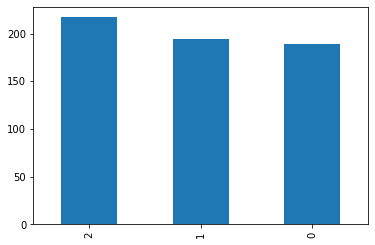

In [13]:

df.MaritalStatus.value_counts().plot(kind='bar') 

In [14]:
# training the model
clf = IsolationForest(random_state=10,contamination=.01)
clf.fit(df)

IsolationForest(contamination=0.01, random_state=10)

In [15]:
# predictions
y_pred_outliers = clf.predict(df)

In [16]:
#-1 for outliers and 1 for inliers.
y_pred_outliers

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [17]:
df['Outliers']=y_pred_outliers # to assign a separate Outliers column 

In [18]:
df

,Undergrad,MaritalStatus,TaxableIncome,CityPopulation,WorkExperience,Urban,Outliers
0,0,2,68833,50047,10,1,1
1,1,0,33700,134075,18,1,1
2,0,1,36925,160205,30,1,1
3,1,2,50190,193264,15,1,1
4,0,1,81002,27533,28,0,1
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,1
596,1,0,69967,55369,2,1,1
597,0,0,47334,154058,0,1,1
598,1,1,98592,180083,17,0,1


In [19]:
df[df.Outliers==-1] # to display the rows which has outliers

,Undergrad,MaritalStatus,TaxableIncome,CityPopulation,WorkExperience,Urban,Outliers
34,1,0,12514,183767,1,1,-1
119,0,0,97318,47202,30,1,-1
161,1,1,93659,185596,30,1,-1
280,0,0,17783,33184,1,0,-1
414,0,0,97980,27300,1,1,-1
541,1,0,12453,191874,30,1,-1


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Undergrad       600 non-null    int32
 1   MaritalStatus   600 non-null    int32
 2   TaxableIncome   600 non-null    int64
 3   CityPopulation  600 non-null    int64
 4   WorkExperience  600 non-null    int64
 5   Urban           600 non-null    int32
 6   Outliers        600 non-null    int32
dtypes: int32(4), int64(3)
memory usage: 23.6 KB


In [21]:
row=(34,119,161,280,414,541)
for i in row:
    df.drop(i,axis=0,inplace=True)



In [22]:
df

,Undergrad,MaritalStatus,TaxableIncome,CityPopulation,WorkExperience,Urban,Outliers
0,0,2,68833,50047,10,1,1
1,1,0,33700,134075,18,1,1
2,0,1,36925,160205,30,1,1
3,1,2,50190,193264,15,1,1
4,0,1,81002,27533,28,0,1
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,1
596,1,0,69967,55369,2,1,1
597,0,0,47334,154058,0,1,1
598,1,1,98592,180083,17,0,1


In [23]:
 #shift column 'TaxableIncome' to first position
first_column = df.pop('TaxableIncome')


In [24]:
# insert column using insert(position,column_name,
# first_column) function
df.insert(0, 'TaxableIncome', first_column)

In [25]:
df

,TaxableIncome,Undergrad,MaritalStatus,CityPopulation,WorkExperience,Urban,Outliers
0,68833,0,2,50047,10,1,1
1,33700,1,0,134075,18,1,1
2,36925,0,1,160205,30,1,1
3,50190,1,2,193264,15,1,1
4,81002,0,1,27533,28,0,1
...,...,...,...,...,...,...,...
595,76340,1,0,39492,7,1,1
596,69967,1,0,55369,2,1,1
597,47334,0,0,154058,0,1,1
598,98592,1,1,180083,17,0,1


In [26]:
userindex = df.index[df['TaxableIncome'] >= 30000]
df.loc[userindex, ["Taxable"]] = "True"

In [27]:
pd.set_option('display.max_rows', None)
df 

,TaxableIncome,Undergrad,MaritalStatus,CityPopulation,WorkExperience,Urban,Outliers,Taxable
0,68833,0,2,50047,10,1,1,True
1,33700,1,0,134075,18,1,1,True
2,36925,0,1,160205,30,1,1,True
3,50190,1,2,193264,15,1,1,True
4,81002,0,1,27533,28,0,1,True
5,33329,0,0,116382,0,0,1,True
6,83357,0,0,80890,8,1,1,True
7,62774,1,2,131253,3,1,1,True
8,83519,0,2,102481,12,1,1,True
9,98152,1,0,155482,4,1,1,True


In [28]:
df.fillna('False')

,TaxableIncome,Undergrad,MaritalStatus,CityPopulation,WorkExperience,Urban,Outliers,Taxable
0,68833,0,2,50047,10,1,1,True
1,33700,1,0,134075,18,1,1,True
2,36925,0,1,160205,30,1,1,True
3,50190,1,2,193264,15,1,1,True
4,81002,0,1,27533,28,0,1,True
5,33329,0,0,116382,0,0,1,True
6,83357,0,0,80890,8,1,1,True
7,62774,1,2,131253,3,1,1,True
8,83519,0,2,102481,12,1,1,True
9,98152,1,0,155482,4,1,1,True


In [29]:
df['Taxable']=label_encoder.fit_transform(df['Taxable'])

In [30]:
x=df.iloc[:,1:6]
y=df.Taxable

In [31]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=42) 

## Building model using Entropy as the criteria

In [32]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3,min_samples_leaf=30,max_leaf_nodes=6)
#model = DecisionTreeClassifier(random_state=0) # Default tree has 293 nodes
model.fit(x_train,y_train).tree_.node_count

11

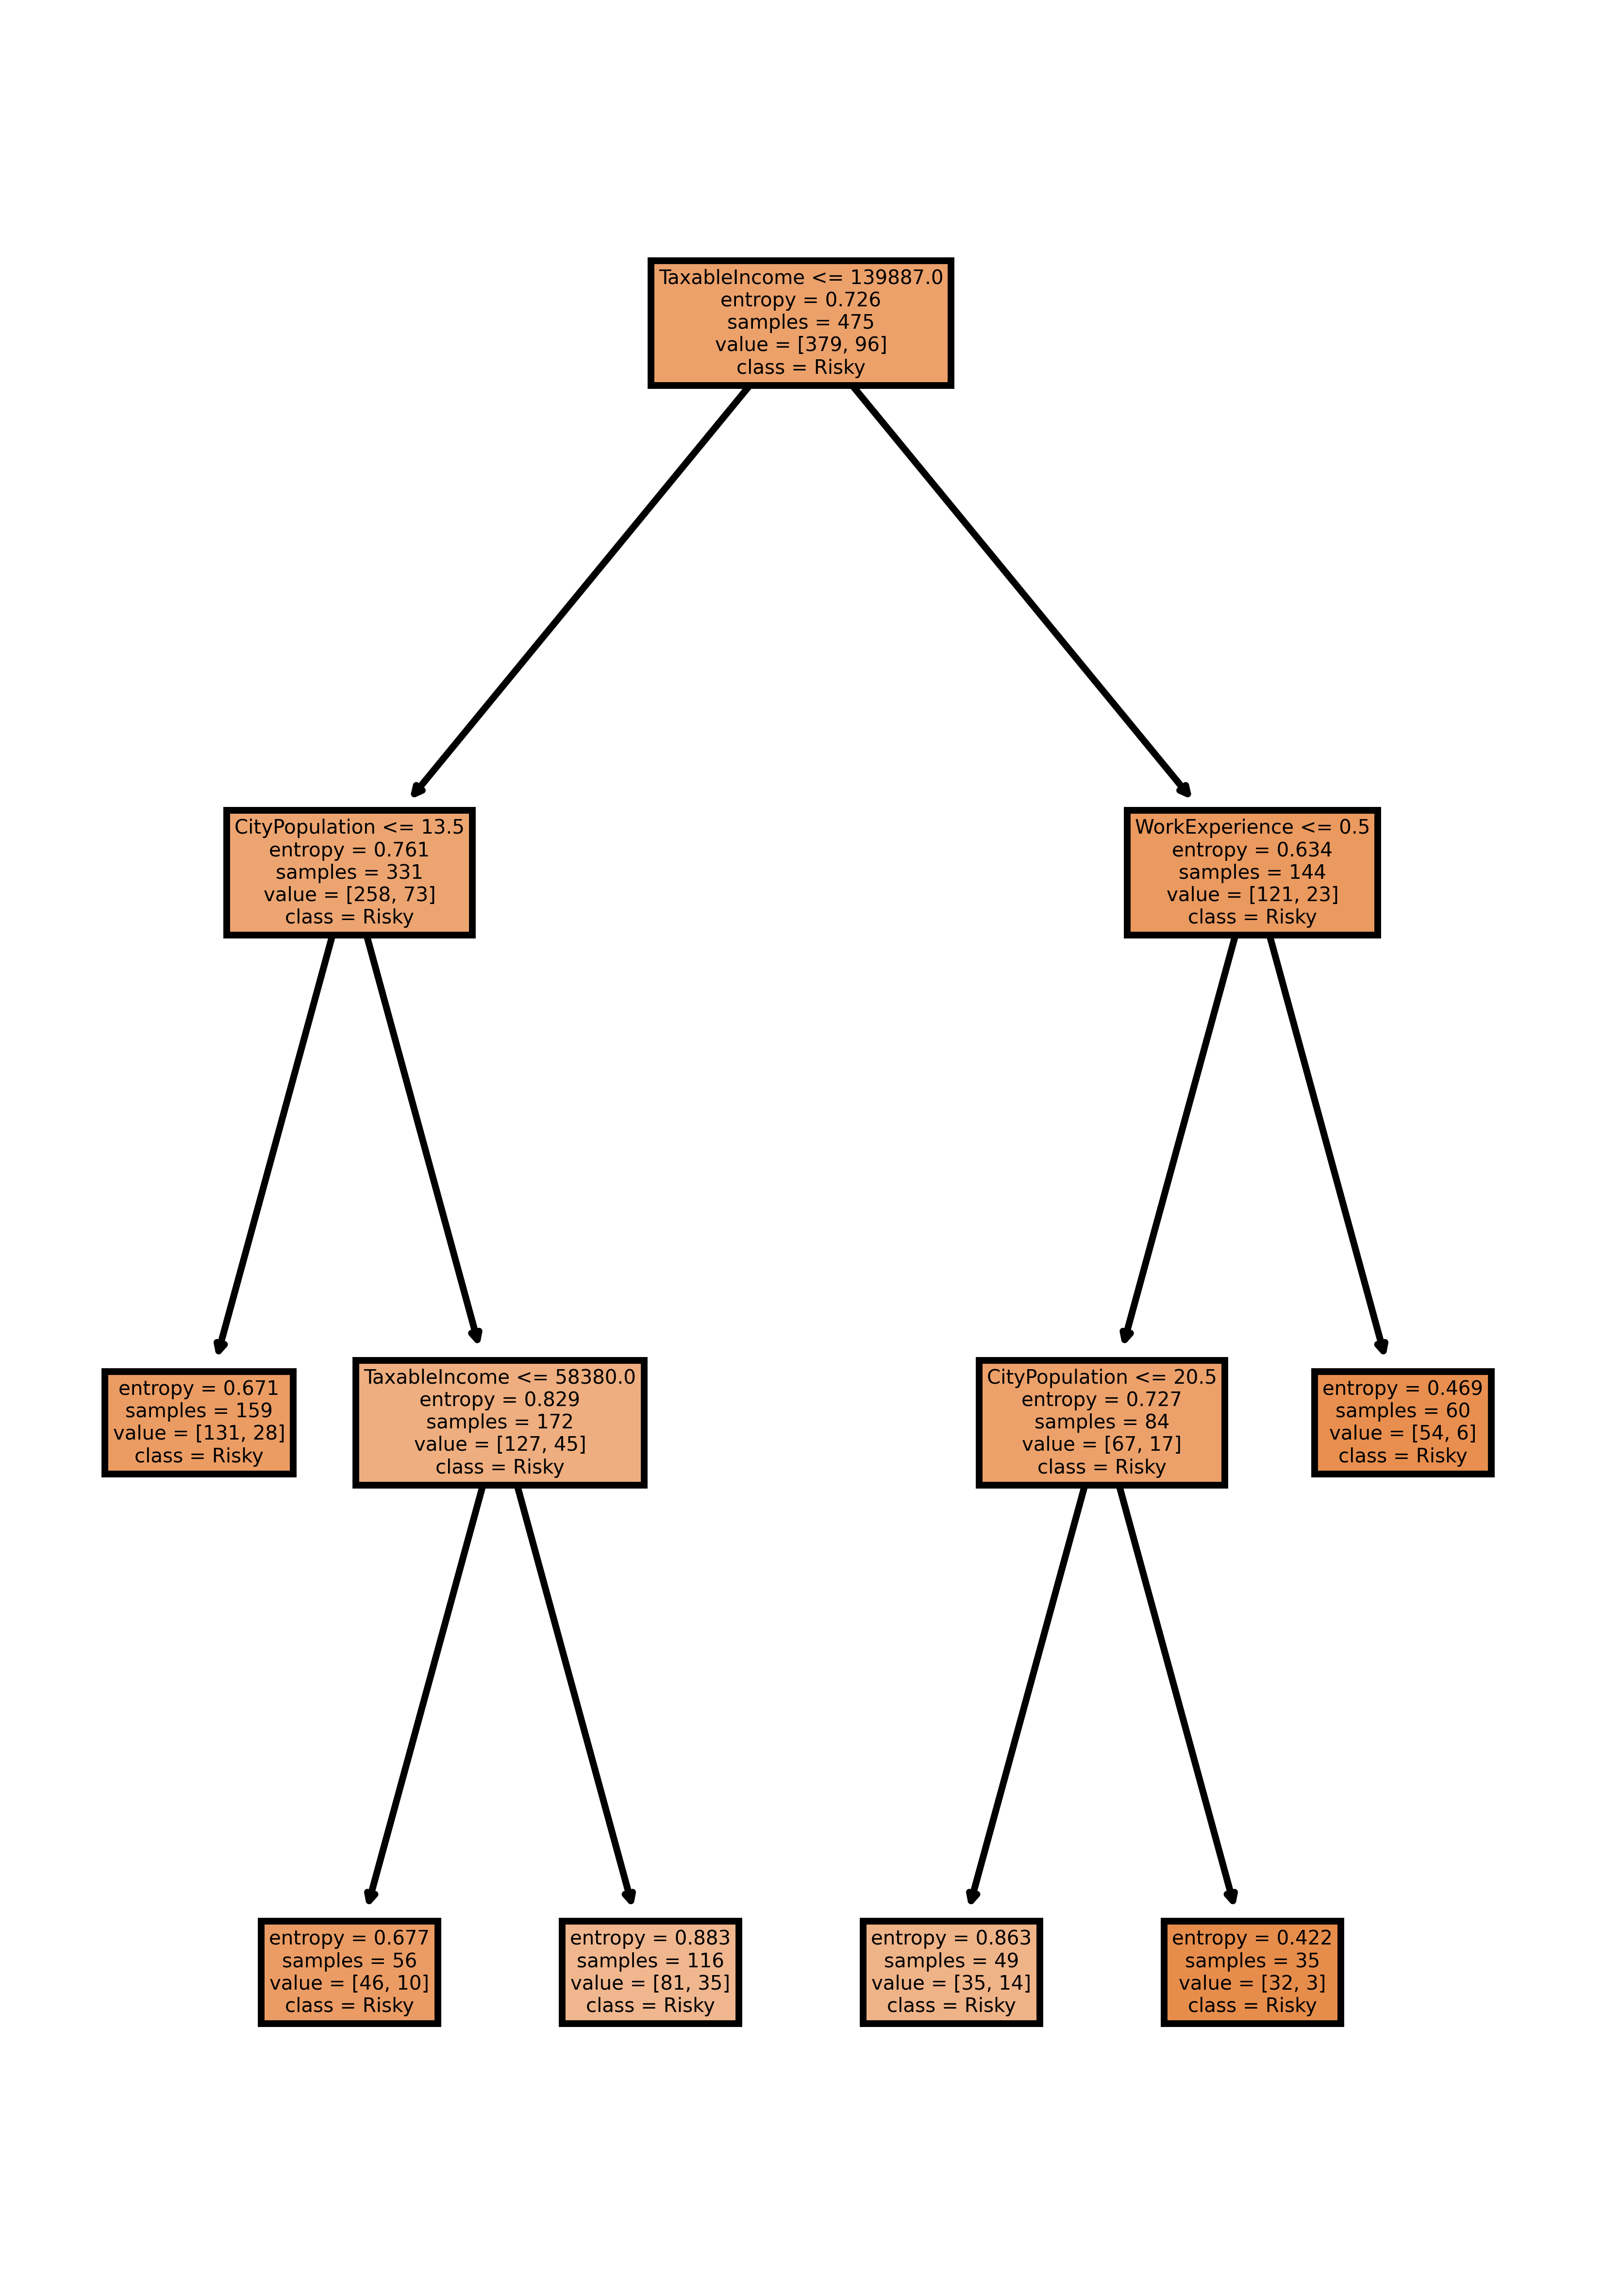

In [33]:
fn=['Undergrad','MaritalStatus', 'TaxableIncome','CityPopulation','WorkExperience']
cn=['Risky','Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,6), dpi=1000)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

In [34]:
model.feature_importances_ 

array([0.        , 0.        , 0.31512107, 0.52041915, 0.16445978])

In [35]:
feature_imp = pd.Series(model.feature_importances_,index=fn).sort_values(ascending=False) 
feature_imp

CityPopulation    0.520419
TaxableIncome     0.315121
WorkExperience    0.164460
Undergrad         0.000000
MaritalStatus     0.000000
dtype: float64

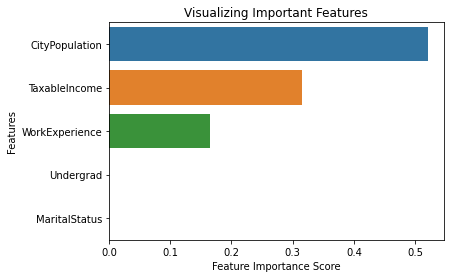

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [37]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category  

0    119
dtype: int64

In [38]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

In [39]:
pd.crosstab(y_test,preds)  # getting the 2 way table to understand the correct and wrong predictions

col_0,0
Taxable,
0,94
1,25


In [40]:
# Accuracy 
np.mean(preds==y_test)

0.7899159663865546

In [41]:
# Bagged Decision Trees for Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
array = df.values
X = array[:,0:6]
Y = array[:,-1]
seed = 7

kfold = KFold(n_splits=10, random_state=seed,shuffle = True)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean()) 

0.9983333333333334


In [42]:
# AdaBoost Classification

from sklearn.ensemble import AdaBoostClassifier
seed=9
num_trees = 10
kfold = KFold(n_splits=10)
model = AdaBoostClassifier(n_estimators=num_trees, learning_rate=0.8,random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.9983050847457626


In [43]:
# Stacking Ensemble for Classification
from pandas import read_csv

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
kfold = KFold(n_splits=10)

# create the sub models
estimators = []
model1 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())

0.9849435028248588


In [44]:
# fit model no training data
model = XGBClassifier(gamma=.65,n_estimators=400,max_depth=4, max_leaves=2,
                     learning_rate=0.360000012)
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.65, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.360000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=2, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=400,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [45]:
# make predictions for test data
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]

In [46]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 81.51%


In [47]:
predictions

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0]

## Light Gbm

In [48]:
import lightgbm as lgb
d_train = lgb.Dataset(x_train, label=y_train)

In [49]:
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10

In [50]:
clf = lgb.train(params, d_train, 500) 

[LightGBM] [Info] Number of positive: 96, number of negative: 379
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000103 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 475, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.202105 -> initscore=-1.373188
[LightGBM] [Info] Start training from score -1.373188
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [51]:
#Prediction
y_pred=clf.predict(x_test)

In [52]:
predictions = [round(value) for value in y_pred]

In [53]:
accuracy = accuracy_score(y_test, predictions)

In [54]:
accuracy

0.7899159663865546

In [55]:
predictions

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

## As per the above we can infer that the predictions are close to 99% for Bagging, Adaboost and Stacking Ensemble models